In [1]:
from reinforce_lake import PolicyNetwork, reinforce
from torch import optim
import gym
import matplotlib.pyplot as plt
import pandas as pd
import torch


In [4]:
def run_with_seed(seed):
    torch.manual_seed(seed)
    env = gym.make("FrozenLake-v1", is_slippery=True, desc=["SFFH", "FFFF", "FFFF", "FFFG"])
    n_actions = env.action_space.n
    n_features = 6  # Based on our extract_features function

    policy = PolicyNetwork(n_features, n_actions)
    optimizer = optim.Adam(policy.parameters(), lr=3e-4)

    results = reinforce(env, policy, optimizer, 20000, 0.99, 1)
    return results


In [5]:
results = [
    run_with_seed(seed) for seed in range(10)
]


/Users/deepakhr/miniconda3/envs/py311/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0, Loss: -326.5986633300781, G=-22.21786406008532
Episode 1000, Loss: -282.6307373046875, G=-19.027213177874142
Episode 2000, Loss: -80.89906311035156, G=-11.361512828387072
Episode 3000, Loss: -56.9838981628418, G=-8.64827525163591
Episode 4000, Loss: -75.90617370605469, G=-10.466174574128356
Episode 5000, Loss: -379.0582275390625, G=-28.22694674017248
Episode 6000, Loss: -82.94697570800781, G=-15.705680661607312
Episode 7000, Loss: -7.1356706619262695, G=-4.90099501
Episode 8000, Loss: -42.619266510009766, G=-8.203486240490363
Episode 9000, Loss: -144.8394012451172, G=-19.446629338016262
Episode 10000, Loss: -220.39048767089844, G=-19.446629338016262
Episode 11000, Loss: -127.74574279785156, G=-17.383137616441328
Episode 12000, Loss: -35.82320022583008, G=-7.276248727768044
Episode 13000, Loss: -163.41238403320312, G=-16.54862385499124
Episode 14000, Loss: -117.05438232421875, G=-12.247897700103202
Episode 15000, Loss: 10.816919326782227, G=1.5019163870712111
Episode 16000, L

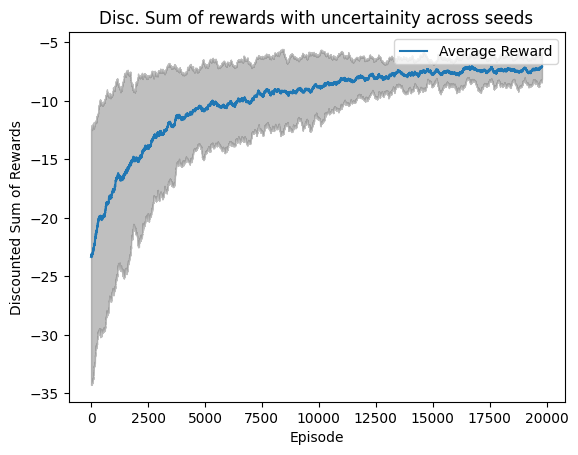

In [13]:
import numpy as np
rolled_up = []
for result in results:
    r = pd.Series(result).rolling(200).mean().dropna()
    rolled_up.append(r)
rolled_up = np.array(rolled_up)

avg_rewards = rolled_up.mean(0)
std_rewards = rolled_up.std(0)

plt.plot(avg_rewards, label="Average Reward")
plt.fill_between(range(len(avg_rewards)), avg_rewards - std_rewards, avg_rewards + std_rewards, color='gray', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Discounted Sum of Rewards')
plt.title('Disc. Sum of rewards with uncertainity across seeds (Reinforce)')
plt.legend()
plt.show()
